In [1]:
# Assume that groups are given in another CSV

In [2]:
# Necessary imports:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from string import ascii_uppercase
from operator import itemgetter

import os

# Setting up current directory:
CURRENT_DIRECTORY = os.getcwd()

In [3]:
# Get file name:
DATA_FILE_NAME = input("Data file name: ")
GROUPS_FILE_NAME = input("Groups file name: ")

Data file name: random_data.csv
Groups file name: groups.csv


In [4]:
# Read data file:
df = pd.read_csv(CURRENT_DIRECTORY + "/" + DATA_FILE_NAME, header=None)
num_rows = len(df.index)
num_cols = len(df.columns)
df.index = range(1, num_rows+1)
df.columns = itemgetter(*df.columns)(ascii_uppercase)

df

,A,B,C,D,E,F,G,H,I,J,K,L
1,9,1,20,6,28,5,40,9,47,4,60,5
2,10,0,15,6,26,1,30,6,49,0,59,4
3,1,0,16,6,27,7,30,10,41,9,58,6
4,4,0,10,0,21,8,33,8,48,9,56,7
5,2,5,16,1,24,3,40,2,48,4,52,10
6,1,6,20,5,26,8,33,10,45,8,57,5
7,1,4,17,0,30,7,40,6,48,10,52,0
8,1,1,11,6,28,9,40,5,40,10,50,8


In [5]:
# Read groups file: 
df2 = pd.read_csv(CURRENT_DIRECTORY + "/" + GROUPS_FILE_NAME, header=None)
num_rows = len(df.index)
num_cols = len(df.columns)
df2.index = range(1, num_rows+1)
df2.columns = itemgetter(*df2.columns)(ascii_uppercase)

df2

,A,B,C,D,E,F,G,H,I,J,K,L
1,ControlA%%C,ControlA%%C%%H,Group1%%TControlA,Group1%%H%%TControlA,Group2%%TControlA,Group2%%H%%TControlA,Group3%%TControlA,Group3%%H%%TControlA,Group4%%TControlA,Group4%%H%%TControlA,Group5%%TControlA,Group5%%H%%TControlA
2,ControlA%%C,ControlA%%C%%H,Group1%%TControlA,Group1%%H%%TControlA,Group2%%TControlA,Group2%%H%%TControlA,Group3%%TControlA,Group3%%H%%TControlA,Group4%%TControlA,Group4%%H%%TControlA,Group5%%TControlA,Group5%%H%%TControlA
3,ControlA%%C,ControlA%%C%%H,Group1%%TControlA,Group1%%H%%TControlA,Group2%%TControlA,Group2%%H%%TControlA,Group3%%TControlA,Group3%%H%%TControlA,Group4%%TControlA,Group4%%H%%TControlA,Group5%%TControlA,Group5%%H%%TControlA
4,ControlA%%C,ControlA%%C%%H,Group1%%TControlA,Group1%%H%%TControlA,Group2%%TControlA,Group2%%H%%TControlA,Group3%%TControlA,Group3%%H%%TControlA,Group4%%TControlA,Group4%%H%%TControlA,Group5%%TControlA,Group5%%H%%TControlA
5,ControlB%%C,ControlB%%C%%H,Group6%%TControlB,Group6%%H%%TControlB,Group7%%TControlB,Group7%%H%%TControlB,Group8%%TControlB,Group8%%H%%TControlB,Group9%%TControlB,Group9%%H%%TControlB,Group10%%TControlB,Group10%%H%%TControlB
6,ControlB%%C,ControlB%%C%%H,Group6%%TControlB,Group6%%H%%TControlB,Group7%%TControlB,Group7%%H%%TControlB,Group8%%TControlB,Group8%%H%%TControlB,Group9%%TControlB,Group9%%H%%TControlB,Group10%%TControlB,Group10%%H%%TControlB
7,ControlB%%C,ControlB%%C%%H,Group6%%TControlB,Group6%%H%%TControlB,Group7%%TControlB,Group7%%H%%TControlB,Group8%%TControlB,Group8%%H%%TControlB,Group9%%TControlB,Group9%%H%%TControlB,Group10%%TControlB,Group10%%H%%TControlB
8,ControlB%%C,ControlB%%C%%H,Group6%%TControlB,Group6%%H%%TControlB,Group7%%TControlB,Group7%%H%%TControlB,Group8%%TControlB,Group8%%H%%TControlB,Group9%%TControlB,Group9%%H%%TControlB,Group10%%TControlB,Group10%%H%%TControlB


In [6]:
# Create dictionary of groups data
groups_dict = {}

for row in df.index:
    for col in df.columns:
        current_group = df2[col][row]
        current_value = df[col][row]
        if current_group not in groups_dict.keys():
            groups_dict[current_group] = [current_value]
        else:
            groups_dict[current_group].append(current_value)
        
groups_dict

{'ControlA%%C': [9, 10, 1, 4],
 'ControlA%%C%%H': [1, 0, 0, 0],
 'Group1%%TControlA': [20, 15, 16, 10],
 'Group1%%H%%TControlA': [6, 6, 6, 0],
 'Group2%%TControlA': [28, 26, 27, 21],
 'Group2%%H%%TControlA': [5, 1, 7, 8],
 'Group3%%TControlA': [40, 30, 30, 33],
 'Group3%%H%%TControlA': [9, 6, 10, 8],
 'Group4%%TControlA': [47, 49, 41, 48],
 'Group4%%H%%TControlA': [4, 0, 9, 9],
 'Group5%%TControlA': [60, 59, 58, 56],
 'Group5%%H%%TControlA': [5, 4, 6, 7],
 'ControlB%%C': [2, 1, 1, 1],
 'ControlB%%C%%H': [5, 6, 4, 1],
 'Group6%%TControlB': [16, 20, 17, 11],
 'Group6%%H%%TControlB': [1, 5, 0, 6],
 'Group7%%TControlB': [24, 26, 30, 28],
 'Group7%%H%%TControlB': [3, 8, 7, 9],
 'Group8%%TControlB': [40, 33, 40, 40],
 'Group8%%H%%TControlB': [2, 10, 6, 5],
 'Group9%%TControlB': [48, 45, 48, 40],
 'Group9%%H%%TControlB': [4, 8, 10, 10],
 'Group10%%TControlB': [52, 57, 52, 50],
 'Group10%%H%%TControlB': [10, 5, 0, 8]}

# Relative quantification by 2^(Delta Delta CT) 
1. Compute average values of each group
2. Use dictionary of dictionaries
2. Calculate Delta CT by subtracting gene of interest and housekeeping gene averages within same group
3. Calculate Delta Delta CT by subtracting Delta CT of experiment and controls
4. Calculate RQ = 2^(Delta Delta CT)

In [7]:
# Preprocessing
groups_dict_new = {}
for key in groups_dict.keys():
    if "%%H" in key:
        housekeeping = key.replace("%%H", "")
        if housekeeping not in groups_dict_new.keys():
            groups_dict_new[housekeeping] = {
                'housekeeping': key
            }
        else:
            groups_dict_new[housekeeping]['housekeeping'] = key
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'housekeeping': None
            }
        else:
            groups_dict_new[housekeeping]['housekeeping'] = None
    if "%%C" in key:
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'is_control': True,
            }
        else:
            groups_dict_new[key]['is_control'] = True
    else: 
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'is_control': None,
            }
        else:
            groups_dict_new[key]['is_control'] = None
    if "%%T" in key:
        index = key.find("%%T")
        control = key[index + 3:]
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'control': control
            }
        else:
            groups_dict_new[key]['control'] = control
    else:
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'control': None,
            }
        else:
            groups_dict_new[key]['control'] = None
    if "%%G" in key:
        index = key.find("%%G")
        control = key[index + 3:]
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'control': control
            }
        else:
            groups_dict_new[key]['control'] = control
    else:
        if key not in groups_dict_new.keys():
            groups_dict_new[key] = {
                'control': None,
            }
        else:
            groups_dict_new[key]['control'] = None
        

In [8]:
# Calculate means
for key, value in groups_dict.items():
    groups_dict_new[key]['mean'] = np.mean(value)

In [9]:
# Calculate Delta CT
for key in groups_dict_new.keys():
    housekeeping = groups_dict_new[key]['housekeeping']
    if housekeeping:
        groups_dict_new[key]['dCT'] = groups_dict_new[key]['mean'] - groups_dict_new[housekeeping]['mean']
    else:
        groups_dict_new[key]['dCT'] = None

In [10]:
# Calculate Delta Delta CT and RQ
for key in groups_dict_new.keys():
    control = groups_dict_new[key]['control']
    if control and groups_dict_new[key]['dCT']:
        groups_dict_new[key]['ddCT'] = groups_dict_new[key]['dCT'] - groups_dict_new[control+"%%C"]['dCT']
        groups_dict_new[key]['RQ'] = 2 ** -groups_dict_new[key]['ddCT']
    elif groups_dict_new[key]['is_control'] and groups_dict_new[key]['housekeeping']:
        groups_dict_new[key]['ddCT'] = 0
        groups_dict_new[key]['RQ'] = 1
    else:
        groups_dict_new[key]['ddCT'] = None
        groups_dict_new[key]['RQ'] = None

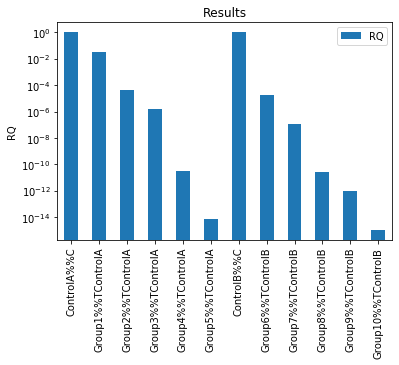

In [11]:
# Convert to DataFrame and plot
data = pd.DataFrame(groups_dict_new).drop(['control', 'is_control', 'mean', 'housekeeping'])
data = data.dropna(axis=1, how='all').transpose()

data.plot.bar(y='RQ', logy=True)
plt.title("Results")
plt.ylabel('RQ')

plt.show()

# If each cell is marked by GROUP (`%%G1`), then the control can be marked (`%%C`), so the (`%%T`) labels would not be needed

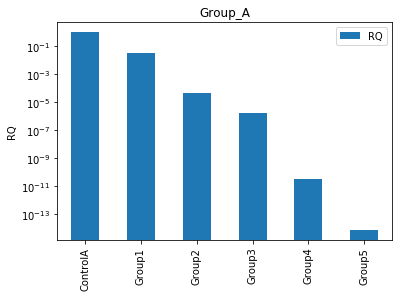

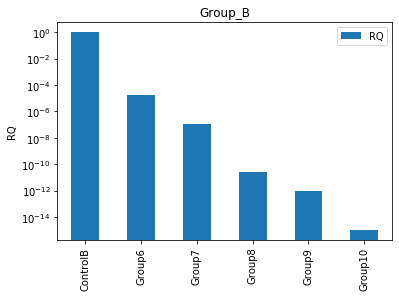

In [12]:
data2 = data.copy()

data2['Group'] = ['Group_A'] * 6 + ['Group_B'] * 6
data2.rename(index=lambda s: s[:s.find("%%")], inplace=True)
groups = set()
for group in data2['Group']:
    groups.add(group)
    
for group in groups:
    data2.loc[data2['Group'] == group].plot.bar(y='RQ', logy=True)
    plt.title(group)
    plt.ylabel('RQ')
    plt.show()

In [13]:
data2

,RQ,dCT,ddCT,Group
ControlA,1,5.75,0,Group_A
Group1,0.03125,10.75,5,Group_A
Group2,4.31584e-05,20.25,14.5,Group_A
Group3,1.60388e-06,25,19.25,Group_A
Group4,2.91038e-11,40.75,35,Group_A
Group5,7.10543e-15,52.75,47,Group_A
ControlB,1,-2.75,0,Group_B
Group6,1.81459e-05,13,15.75,Group_B
Group7,1.19209e-07,20.25,23,Group_B
Group8,2.44733e-11,32.5,35.25,Group_B
